In [ ]:
# pip install pycaret[full]

In [ ]:
!wget -q https://archive.ics.uci.edu/static/public/22/chess+king+rook+vs+king+pawn.zip
!unzip -q chess+king+rook+vs+king+pawn.zip

replace Index? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pycaret
pycaret.__version__

'3.2.0'

In [ ]:
from pycaret.classification import *
from pycaret.classification import ClassificationExperiment
exp = ClassificationExperiment()

In [ ]:
from pycaret.datasets import get_data
data = pd.read_csv('kr-vs-kp.data', header = None)

In [ ]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,t,t,n,won
1,f,f,f,f,t,f,f,f,f,f,...,f,f,f,f,f,f,t,t,n,won
2,f,f,f,f,t,f,t,f,f,f,...,f,f,f,f,f,f,t,t,n,won
3,f,f,f,f,f,f,f,f,t,f,...,f,f,f,f,f,f,t,t,n,won
4,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,t,t,n,won


In [ ]:
data.shape

(3195, 37)

In [ ]:
s= setup(data,target ='36', session_id=123)

,Description,Value
0,Session id,123
1,Target,36
2,Target type,Binary
3,Target mapping,"nowin: 0, won: 1"
4,Original data shape,"(3196, 37)"
5,Transformed data shape,"(3196, 39)"
6,Transformed train set shape,"(2237, 39)"
7,Transformed test set shape,"(959, 39)"
8,Ordinal features,34
9,Categorical features,36


In [ ]:
type(exp)

pycaret.classification.oop.ClassificationExperiment

In [ ]:
exp.setup(data, target = '36')

,Description,Value
0,Session id,5578
1,Target,36
2,Target type,Binary
3,Target mapping,"nowin: 0, won: 1"
4,Original data shape,"(3196, 37)"
5,Transformed data shape,"(3196, 39)"
6,Transformed train set shape,"(2237, 39)"
7,Transformed test set shape,"(959, 39)"
8,Ordinal features,35
9,Categorical features,36


In [ ]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9946,0.9948,0.9946,0.9947,0.9946,0.9893,0.9893,0.3930
catboost,CatBoost Classifier,0.9933,0.9992,0.9933,0.9934,0.9933,0.9866,0.9866,4.1340
xgboost,Extreme Gradient Boosting,0.9911,0.9993,0.9911,0.9911,0.9911,0.9821,0.9821,0.5050
lightgbm,Light Gradient Boosting Machine,0.9911,0.9994,0.9911,0.9911,0.9911,0.9821,0.9822,0.5260
et,Extra Trees Classifier,0.9902,0.9988,0.9902,0.9903,0.9902,0.9803,0.9804,0.8750
rf,Random Forest Classifier,0.9888,0.9986,0.9888,0.9889,0.9888,0.9776,0.9777,0.6410
gbc,Gradient Boosting Classifier,0.9794,0.9974,0.9794,0.9797,0.9794,0.9588,0.9591,0.8930
ada,Ada Boost Classifier,0.9651,0.9929,0.9651,0.9653,0.9651,0.9301,0.9303,0.5380
lr,Logistic Regression,0.9611,0.9921,0.9611,0.9613,0.9611,0.9220,0.9223,1.0920
svm,SVM - Linear Kernel,0.9602,0.0000,0.9602,0.9612,0.9602,0.9203,0.9213,0.4760


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [ ]:
exp.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9933,0.9997,0.9933,0.9933,0.9933,0.9865,0.9866,0.8360
catboost,CatBoost Classifier,0.9928,0.9995,0.9928,0.9929,0.9928,0.9857,0.9857,4.0430
dt,Decision Tree Classifier,0.9920,0.9918,0.9920,0.9920,0.9919,0.9839,0.9839,0.6110
xgboost,Extreme Gradient Boosting,0.9920,0.9995,0.9920,0.9920,0.9919,0.9839,0.9839,0.4700
et,Extra Trees Classifier,0.9893,0.9979,0.9893,0.9894,0.9893,0.9785,0.9786,0.8010
rf,Random Forest Classifier,0.9884,0.9981,0.9884,0.9885,0.9884,0.9767,0.9768,0.8780
gbc,Gradient Boosting Classifier,0.9754,0.9977,0.9754,0.9758,0.9754,0.9507,0.9511,0.6160
ada,Ada Boost Classifier,0.9620,0.9945,0.9620,0.9622,0.9620,0.9238,0.9240,0.7370
lr,Logistic Regression,0.9589,0.9928,0.9589,0.9590,0.9589,0.9176,0.9177,1.1450
knn,K Neighbors Classifier,0.9540,0.9850,0.9540,0.9543,0.9539,0.9077,0.9081,0.4170


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=5578, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

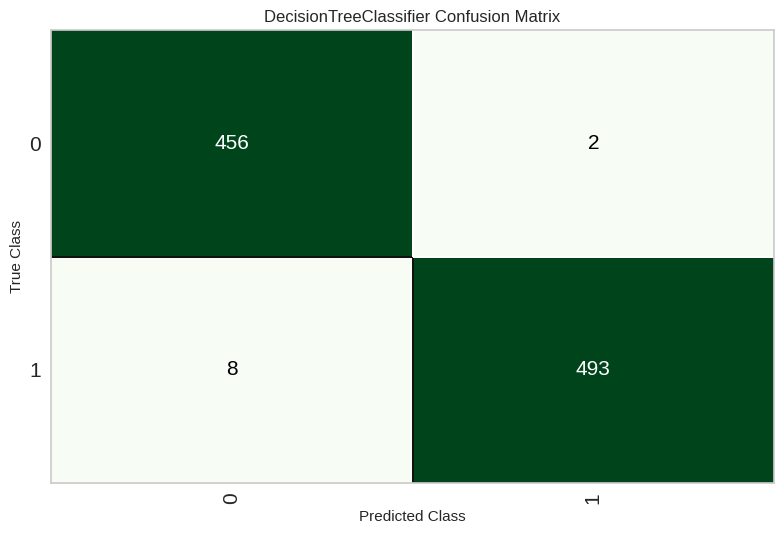

In [ ]:
plot_model(best, plot = 'confusion_matrix')

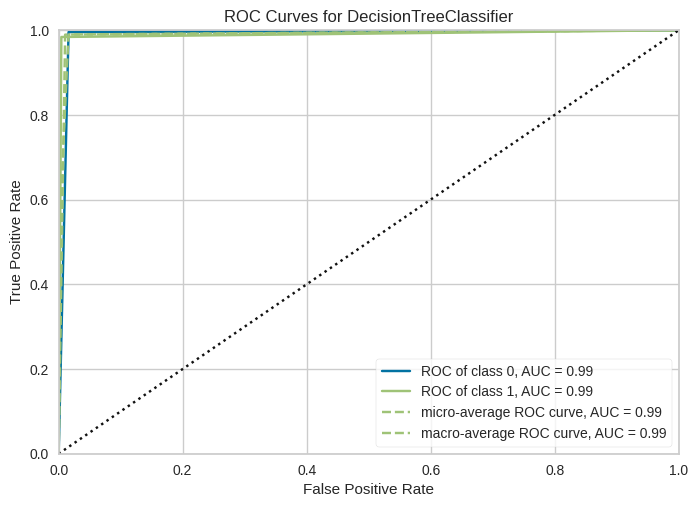

In [ ]:
plot_model( best, plot ='auc')

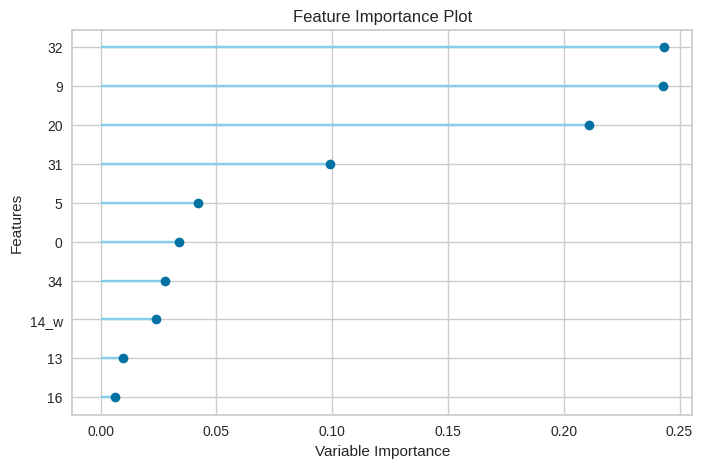

In [ ]:
plot_model(best, plot = 'feature')

In [ ]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.9896,0.9898,0.9896,0.9897,0.9896,0.9791,0.9792


In [ ]:
holdout_pred.head()

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,prediction_label,prediction_score
155,f,f,f,f,t,t,t,f,f,f,...,f,f,f,f,t,f,n,won,won,1.0
3124,f,f,f,t,t,t,f,f,t,f,...,t,f,f,t,f,t,t,nowin,nowin,1.0
1800,f,f,f,f,f,t,t,f,f,f,...,f,t,f,f,f,f,n,won,won,1.0
1441,f,f,f,f,f,t,f,f,f,t,...,f,f,f,f,t,t,n,nowin,nowin,1.0
663,f,f,f,f,f,t,f,f,f,f,...,f,f,f,f,f,t,t,won,won,1.0


In [ ]:
# new_data = data.copy()
# new_data.drop('36', axis=1, inplace=True)
# new_data.head()

KeyError: ignored

In [ ]:
save_model(best,'my_first_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None, include=[],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbo...
                                                               handle_unknown='value',
                  

In [ ]:
loaded_best_pipeline = load_model('my_first_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None, include=[],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='...
                                                              handle_unknown='value',
                                                              return_df=True,
                                                              use_cat_names=True,
                                                              verbose=0))),
                ('trained_model',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        random_state=123, splitter='best'))],
         verbose=False)

In [ ]:
s = setup(data, target = '36')

,Description,Value
0,Session id,1623
1,Target,36
2,Target type,Binary
3,Target mapping,"nowin: 0, won: 1"
4,Original data shape,"(3196, 37)"
5,Transformed data shape,"(3196, 39)"
6,Transformed train set shape,"(2237, 39)"
7,Transformed test set shape,"(959, 39)"
8,Ordinal features,34
9,Categorical features,36


In [ ]:
get_config

<function pycaret.classification.functional.get_config(variable: Optional[str] = None)>

In [ ]:
get_config('X_train_transformed')

,0,1,2,3,4,5,6,7,8,9,...,26,27_f,28,29,30,31,32,33,34,35
1623,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1184,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
2549,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
725,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
201,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2274,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
2051,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1756,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# another example: let's access seed
print("The current seed is: {}".format(get_config('seed')))

# now lets change it using set_config
set_config('seed', 786)
print("The new seed is: {}".format(get_config('seed')))

The current seed is: 1623
The new seed is: 786


In [ ]:
s = setup(data, target = '36', session_id = 123,
          normalize = True, normalize_method = 'minmax')

,Description,Value
0,Session id,123
1,Target,36
2,Target type,Binary
3,Target mapping,"nowin: 0, won: 1"
4,Original data shape,"(3196, 37)"
5,Transformed data shape,"(3196, 39)"
6,Transformed train set shape,"(2237, 39)"
7,Transformed test set shape,"(959, 39)"
8,Ordinal features,34
9,Categorical features,36


<AxesSubplot: >

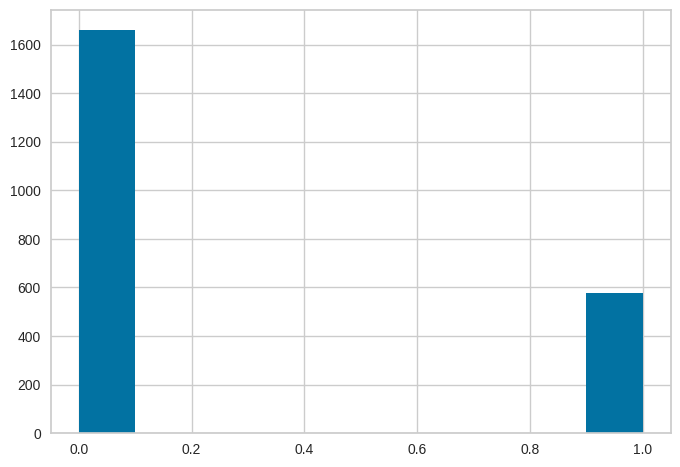

In [ ]:
get_config('X_train_transformed')['35'].hist()

In [ ]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9946,0.9948,0.9946,0.9947,0.9946,0.9893,0.9893,0.4400
catboost,CatBoost Classifier,0.9933,0.9992,0.9933,0.9934,0.9933,0.9866,0.9866,4.1790
xgboost,Extreme Gradient Boosting,0.9911,0.9993,0.9911,0.9911,0.9911,0.9821,0.9821,0.4840
lightgbm,Light Gradient Boosting Machine,0.9911,0.9994,0.9911,0.9911,0.9911,0.9821,0.9822,1.0210
et,Extra Trees Classifier,0.9902,0.9988,0.9902,0.9903,0.9902,0.9803,0.9804,0.8610
rf,Random Forest Classifier,0.9888,0.9986,0.9888,0.9889,0.9888,0.9776,0.9777,0.9000
gbc,Gradient Boosting Classifier,0.9794,0.9974,0.9794,0.9797,0.9794,0.9588,0.9591,0.8310
ada,Ada Boost Classifier,0.9651,0.9929,0.9651,0.9653,0.9651,0.9301,0.9303,0.5590
svm,SVM - Linear Kernel,0.9633,0.0000,0.9633,0.9635,0.9634,0.9266,0.9268,0.6000
lr,Logistic Regression,0.9611,0.9921,0.9611,0.9613,0.9611,0.9220,0.9223,0.9140


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [ ]:
# check available models
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [ ]:
compare_tree_models = compare_models(include = ['dt', 'rf', 'et', 'gbc', 'xgboost', 'lightgbm', 'catboost'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9946,0.9948,0.9946,0.9947,0.9946,0.9893,0.9893,0.6350
catboost,CatBoost Classifier,0.9933,0.9992,0.9933,0.9934,0.9933,0.9866,0.9866,3.9900
xgboost,Extreme Gradient Boosting,0.9911,0.9993,0.9911,0.9911,0.9911,0.9821,0.9821,0.7050
lightgbm,Light Gradient Boosting Machine,0.9911,0.9994,0.9911,0.9911,0.9911,0.9821,0.9822,1.0940
et,Extra Trees Classifier,0.9902,0.9988,0.9902,0.9903,0.9902,0.9803,0.9804,0.8780
rf,Random Forest Classifier,0.9888,0.9986,0.9888,0.9889,0.9888,0.9776,0.9777,0.6810
gbc,Gradient Boosting Classifier,0.9794,0.9974,0.9794,0.9797,0.9794,0.9588,0.9591,0.6270


Processing:   0%|          | 0/33 [00:00<?, ?it/s]

In [ ]:
compare_tree_models

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=123, splitter='best')

In [ ]:
compare_tree_models_results = pull()
compare_tree_models_results

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9946,0.9948,0.9946,0.9947,0.9946,0.9893,0.9893,0.635
catboost,CatBoost Classifier,0.9933,0.9992,0.9933,0.9934,0.9933,0.9866,0.9866,3.990
xgboost,Extreme Gradient Boosting,0.9911,0.9993,0.9911,0.9911,0.9911,0.9821,0.9821,0.705
lightgbm,Light Gradient Boosting Machine,0.9911,0.9994,0.9911,0.9911,0.9911,0.9821,0.9822,1.094
et,Extra Trees Classifier,0.9902,0.9988,0.9902,0.9903,0.9902,0.9803,0.9804,0.878
rf,Random Forest Classifier,0.9888,0.9986,0.9888,0.9889,0.9888,0.9776,0.9777,0.681
gbc,Gradient Boosting Classifier,0.9794,0.9974,0.9794,0.9797,0.9794,0.9588,0.9591,0.627


In [ ]:
best_recall_models_top3 = compare_models(sort = 'Recall', n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9946,0.9948,0.9946,0.9947,0.9946,0.9893,0.9893,0.6420
catboost,CatBoost Classifier,0.9933,0.9992,0.9933,0.9934,0.9933,0.9866,0.9866,4.2120
xgboost,Extreme Gradient Boosting,0.9911,0.9993,0.9911,0.9911,0.9911,0.9821,0.9821,0.4740
lightgbm,Light Gradient Boosting Machine,0.9911,0.9994,0.9911,0.9911,0.9911,0.9821,0.9822,0.9550
et,Extra Trees Classifier,0.9902,0.9988,0.9902,0.9903,0.9902,0.9803,0.9804,0.7710
rf,Random Forest Classifier,0.9888,0.9986,0.9888,0.9889,0.9888,0.9776,0.9777,0.8950
gbc,Gradient Boosting Classifier,0.9794,0.9974,0.9794,0.9797,0.9794,0.9588,0.9591,0.6230
ada,Ada Boost Classifier,0.9651,0.9929,0.9651,0.9653,0.9651,0.9301,0.9303,0.7600
svm,SVM - Linear Kernel,0.9633,0.0000,0.9633,0.9635,0.9634,0.9266,0.9268,0.4140
lr,Logistic Regression,0.9611,0.9921,0.9611,0.9613,0.9611,0.9220,0.9223,0.6560


Processing:   0%|          | 0/71 [00:00<?, ?it/s]

In [ ]:
# list of top 3 models by Recall
best_recall_models_top3

[DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        random_state=123, splitter='best'),
 XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device='cpu', early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=N

In [ ]:
# check all the available models
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [ ]:
# train logistic regression with default fold=10
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9777,0.9962,0.9777,0.9777,0.9777,0.9553,0.9553
1,0.9598,0.9945,0.9598,0.9602,0.9598,0.9196,0.9199
2,0.9732,0.9972,0.9732,0.9733,0.9732,0.9463,0.9464
3,0.9866,0.9954,0.9866,0.9867,0.9866,0.9732,0.9732
4,0.9375,0.9878,0.9375,0.9376,0.9375,0.8747,0.8748
5,0.9375,0.9884,0.9375,0.9376,0.9375,0.8747,0.8748
6,0.9643,0.9966,0.9643,0.9643,0.9643,0.9284,0.9284
7,0.9776,0.9906,0.9776,0.9776,0.9776,0.9551,0.9551
8,0.9327,0.9884,0.9327,0.9335,0.9326,0.8650,0.8659


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
lr_results = pull()
print(type(lr_results))
lr_results

<class 'pandas.core.frame.DataFrame'>


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9777,0.9962,0.9777,0.9777,0.9777,0.9553,0.9553
1,0.9598,0.9945,0.9598,0.9602,0.9598,0.9196,0.9199
2,0.9732,0.9972,0.9732,0.9733,0.9732,0.9463,0.9464
3,0.9866,0.9954,0.9866,0.9867,0.9866,0.9732,0.9732
4,0.9375,0.9878,0.9375,0.9376,0.9375,0.8747,0.8748
5,0.9375,0.9884,0.9375,0.9376,0.9375,0.8747,0.8748
6,0.9643,0.9966,0.9643,0.9643,0.9643,0.9284,0.9284
7,0.9776,0.9906,0.9776,0.9776,0.9776,0.9551,0.9551
8,0.9327,0.9884,0.9327,0.9335,0.9326,0.8650,0.8659


In [ ]:
# train logistic regression with fold=3
lr = create_model('lr', fold=3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9745,0.9963,0.9745,0.9745,0.9745,0.9489,0.9490
1,0.9517,0.9903,0.9517,0.9518,0.9517,0.9033,0.9033
2,0.9544,0.9883,0.9544,0.9544,0.9544,0.9085,0.9086
Mean,0.9602,0.9916,0.9602,0.9602,0.9602,0.9202,0.9203
Std,0.0102,0.0034,0.0102,0.0102,0.0102,0.0204,0.0204


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# train logistic regression with specific model parameters
create_model('lr', C = 0.5, l1_ratio = 0.15)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9777,0.9954,0.9777,0.9777,0.9777,0.9553,0.9553
1,0.9688,0.9937,0.9688,0.9688,0.9688,0.9374,0.9374
2,0.9688,0.9966,0.9688,0.9691,0.9687,0.9373,0.9376
3,0.9821,0.9952,0.9821,0.9823,0.9821,0.9642,0.9644
4,0.9330,0.9855,0.9330,0.9333,0.9330,0.8656,0.8660
5,0.9375,0.9875,0.9375,0.9376,0.9375,0.8747,0.8748
6,0.9598,0.9959,0.9598,0.9598,0.9598,0.9195,0.9195
7,0.9776,0.9902,0.9776,0.9776,0.9776,0.9551,0.9551
8,0.9283,0.9871,0.9283,0.9293,0.9281,0.8560,0.8572


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=0.15, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# train lr and return train score as well alongwith CV
create_model('lr', return_train_score=True)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# train a dt model with default params
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9955,0.9953,0.9955,0.9956,0.9955,0.9911,0.9911
1,0.9911,0.9915,0.9911,0.9912,0.9911,0.9821,0.9823
2,0.9955,0.9957,0.9955,0.9956,0.9955,0.9911,0.9911
3,0.9866,0.9868,0.9866,0.9867,0.9866,0.9732,0.9732
4,0.9911,0.9915,0.9911,0.9912,0.9911,0.9821,0.9823
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9911,0.9915,0.9911,0.9912,0.9911,0.9821,0.9823
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9955,0.9953,0.9955,0.9956,0.9955,0.9910,0.9911


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# tune hyperparameters of dt
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9330,0.9955,0.9330,0.9392,0.9330,0.8665,0.8724
1,0.9464,0.9920,0.9464,0.9489,0.9464,0.8930,0.8953
2,0.9643,0.9947,0.9643,0.9657,0.9643,0.9286,0.9299
3,0.9688,0.9982,0.9688,0.9707,0.9688,0.9375,0.9394
4,0.9286,0.9832,0.9286,0.9310,0.9286,0.8573,0.8595
5,0.9330,0.9848,0.9330,0.9349,0.9331,0.8662,0.8679
6,0.9643,0.9952,0.9643,0.9668,0.9643,0.9287,0.9310
7,0.9462,0.9893,0.9462,0.9500,0.9462,0.8926,0.8962
8,0.9238,0.9824,0.9238,0.9268,0.9238,0.8478,0.8505


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=123, splitter='best')

In [ ]:
# define tuning grid
dt_grid = {'max_depth' : [None, 2, 4, 6, 8, 10, 12]}

# tune model with custom grid and metric = F1
tuned_dt = tune_model(dt, custom_grid = dt_grid, optimize = 'F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9955,0.9953,0.9955,0.9956,0.9955,0.9911,0.9911
1,0.9911,0.9915,0.9911,0.9912,0.9911,0.9821,0.9823
2,0.9955,0.9957,0.9955,0.9956,0.9955,0.9911,0.9911
3,0.9866,0.9868,0.9866,0.9867,0.9866,0.9732,0.9732
4,0.9911,0.9915,0.9911,0.9912,0.9911,0.9821,0.9823
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9911,0.9915,0.9911,0.9912,0.9911,0.9821,0.9823
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9955,0.9953,0.9955,0.9956,0.9955,0.9910,0.9911


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 7 candidates, totalling 70 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
# to access the tuner object you can set return_tuner = True
tuned_dt, tuner = tune_model(dt, return_tuner=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9330,0.9955,0.9330,0.9392,0.9330,0.8665,0.8724
1,0.9464,0.9920,0.9464,0.9489,0.9464,0.8930,0.8953
2,0.9643,0.9947,0.9643,0.9657,0.9643,0.9286,0.9299
3,0.9688,0.9982,0.9688,0.9707,0.9688,0.9375,0.9394
4,0.9286,0.9832,0.9286,0.9310,0.9286,0.8573,0.8595
5,0.9330,0.9848,0.9330,0.9349,0.9331,0.8662,0.8679
6,0.9643,0.9952,0.9643,0.9668,0.9643,0.9287,0.9310
7,0.9462,0.9893,0.9462,0.9500,0.9462,0.8926,0.8962
8,0.9238,0.9824,0.9238,0.9268,0.9238,0.8478,0.8505


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
# model object
tuned_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=123, splitter='best')

In [ ]:
# tuner object
tuner

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=Pipeline(memory=Memory(location=None),
                                      steps=[('label_encoding',
                                              TransformerWrapperWithInverse(exclude=None,
                                                                            include=None,
                                                                            transformer=LabelEncoder())),
                                             ('numerical_imputer',
                                              TransformerWrapper(exclude=None,
                                                                 include=[],
                                                                 transformer=SimpleImputer(add...
                                        'actual_estimator__max_features': [1.0,
                                                                           'sqrt',
                                                                           'log2'],
                                        'actual_estimator__min_impurity_decrease': [0,
                                                                                    0.0001,
                                                                                    0.001,
                                                                                    0.01,
                                                                                    0.0002,
                                                                                    0.002,
                                                                                    0.02,
                                                                                    0.0005,
                                                                                    0.005,
                                                                                    0.05,
                                                                                    0.1,
                                                                                    0.2,
                                                                                    0.3,
                                                                                    0.4,
                                                                                    0.5],
                                        'actual_estimator__min_samples_leaf': [2,
                                                                               3,
                                                                               4,
                                                                               5,
                                                                               6],
                                        'actual_estimator__min_samples_split': [2,
                                                                                5,
                                                                                7,
                                                                                9,
                                                                                10]},
                   pre_dispatch='2*n_jobs', random_state=123, refit=False,
                   return_train_score=False, scoring='accuracy', verbose=1)

In [ ]:
# tune dt using optuna
tuned_dt = tune_model(dt, search_library = 'optuna')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9955,0.9942,0.9955,0.9956,0.9955,0.9911,0.9911
1,0.9866,0.9864,0.9866,0.9867,0.9866,0.9732,0.9732
2,0.9866,0.9896,0.9866,0.9867,0.9866,0.9732,0.9732
3,0.9911,0.9999,0.9911,0.9912,0.9911,0.9821,0.9823
4,0.9821,0.9944,0.9821,0.9821,0.9821,0.9642,0.9642
5,0.9911,0.9983,0.9911,0.9912,0.9911,0.9821,0.9823
6,0.9955,0.9992,0.9955,0.9956,0.9955,0.9911,0.9911
7,0.9821,0.9984,0.9821,0.9822,0.9821,0.9641,0.9642
8,0.9910,0.9981,0.9910,0.9912,0.9910,0.9820,0.9822


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

[I 2023-12-01 00:46:15,000] Searching the best hyperparameters using 2237 samples...
[I 2023-12-01 00:47:18,837] Finished hyperparameter search!


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
# ensemble with bagging
ensemble_model(dt, method = 'Bagging')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9955,1.0000,0.9955,0.9956,0.9955,0.9911,0.9911
1,0.9911,0.9910,0.9911,0.9912,0.9911,0.9821,0.9823
2,0.9911,0.9995,0.9911,0.9911,0.9911,0.9821,0.9821
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9911,0.9994,0.9911,0.9911,0.9911,0.9821,0.9821
5,0.9911,0.9999,0.9911,0.9911,0.9911,0.9821,0.9821
6,0.9911,0.9998,0.9911,0.9912,0.9911,0.9821,0.9823
7,0.9955,1.0000,0.9955,0.9956,0.9955,0.9910,0.9911
8,0.9865,0.9950,0.9865,0.9866,0.9865,0.9730,0.9731


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

BaggingClassifier(base_estimator='deprecated', bootstrap=True,
                  bootstrap_features=False,
                  estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                   class_weight=None,
                                                   criterion='gini',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   random_state=123,
                                                   splitter='best'),
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=123, verbose=0,
                  warm_start=False)

In [ ]:
# ensemble with boosting
ensemble_model(dt, method = 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9911,0.9911,0.9911,0.9911,0.9911,0.9821,0.9821
1,0.9911,0.9915,0.9911,0.9912,0.9911,0.9821,0.9823
2,0.9911,0.9915,0.9911,0.9912,0.9911,0.9821,0.9823
3,0.9866,0.9868,0.9866,0.9867,0.9866,0.9732,0.9732
4,0.9911,0.9911,0.9911,0.9911,0.9911,0.9821,0.9821
5,0.9955,0.9953,0.9955,0.9956,0.9955,0.9911,0.9911
6,0.9955,0.9957,0.9955,0.9956,0.9955,0.9911,0.9911
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9955,0.9953,0.9955,0.9956,0.9955,0.9910,0.9911


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

AdaBoostClassifier(algorithm='SAMME.R', base_estimator='deprecated',
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    random_state=123,
                                                    splitter='best'),
                   learning_rate=1.0, n_estimators=10, random_state=123)

In [ ]:
# top 3 models based on recall
best_recall_models_top3

[DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        random_state=123, splitter='best'),
 XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device='cpu', early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=N

In [ ]:
# blend top 3 models
blend_models(best_recall_models_top3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9911,1.0000,0.9911,0.9912,0.9911,0.9821,0.9823
1,0.9911,0.9979,0.9911,0.9912,0.9911,0.9821,0.9823
2,0.9955,0.9999,0.9955,0.9956,0.9955,0.9911,0.9911
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9911,0.9995,0.9911,0.9912,0.9911,0.9821,0.9823
5,0.9955,1.0000,0.9955,0.9956,0.9955,0.9911,0.9911
6,0.9955,0.9994,0.9955,0.9956,0.9955,0.9911,0.9911
7,0.9955,1.0000,0.9955,0.9956,0.9955,0.9910,0.9911
8,0.9955,0.9993,0.9955,0.9956,0.9955,0.9910,0.9911


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

VotingClassifier(estimators=[('Decision Tree Classifier',
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features=None,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     random_state=123,
                                                     splitter='best')),
                             ('CatBoost Classifier',
                              <catboost.core.CatB...
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=-1,
                                            num_parallel_tree=None,
                                            objective='binary:logistic', ...))],
                 flatten_transform=True, n_jobs=-1, verbose=False,
                 voting='soft', weights=None)

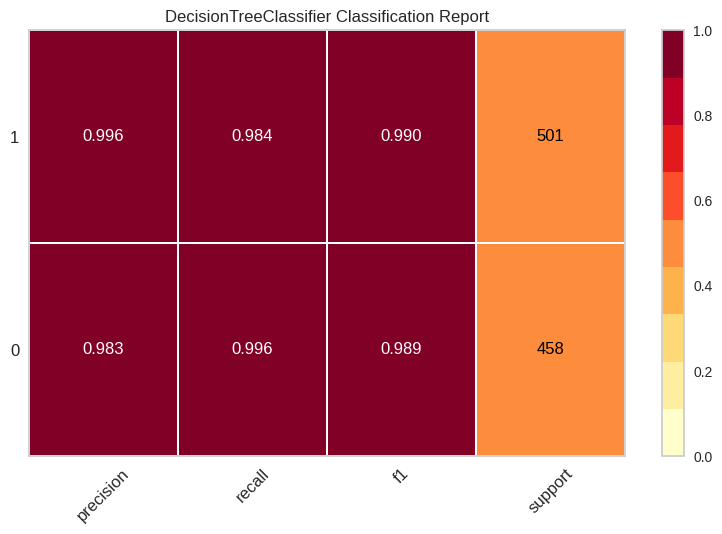

In [105]:
# plot class report
plot_model(best, plot = 'class_report')

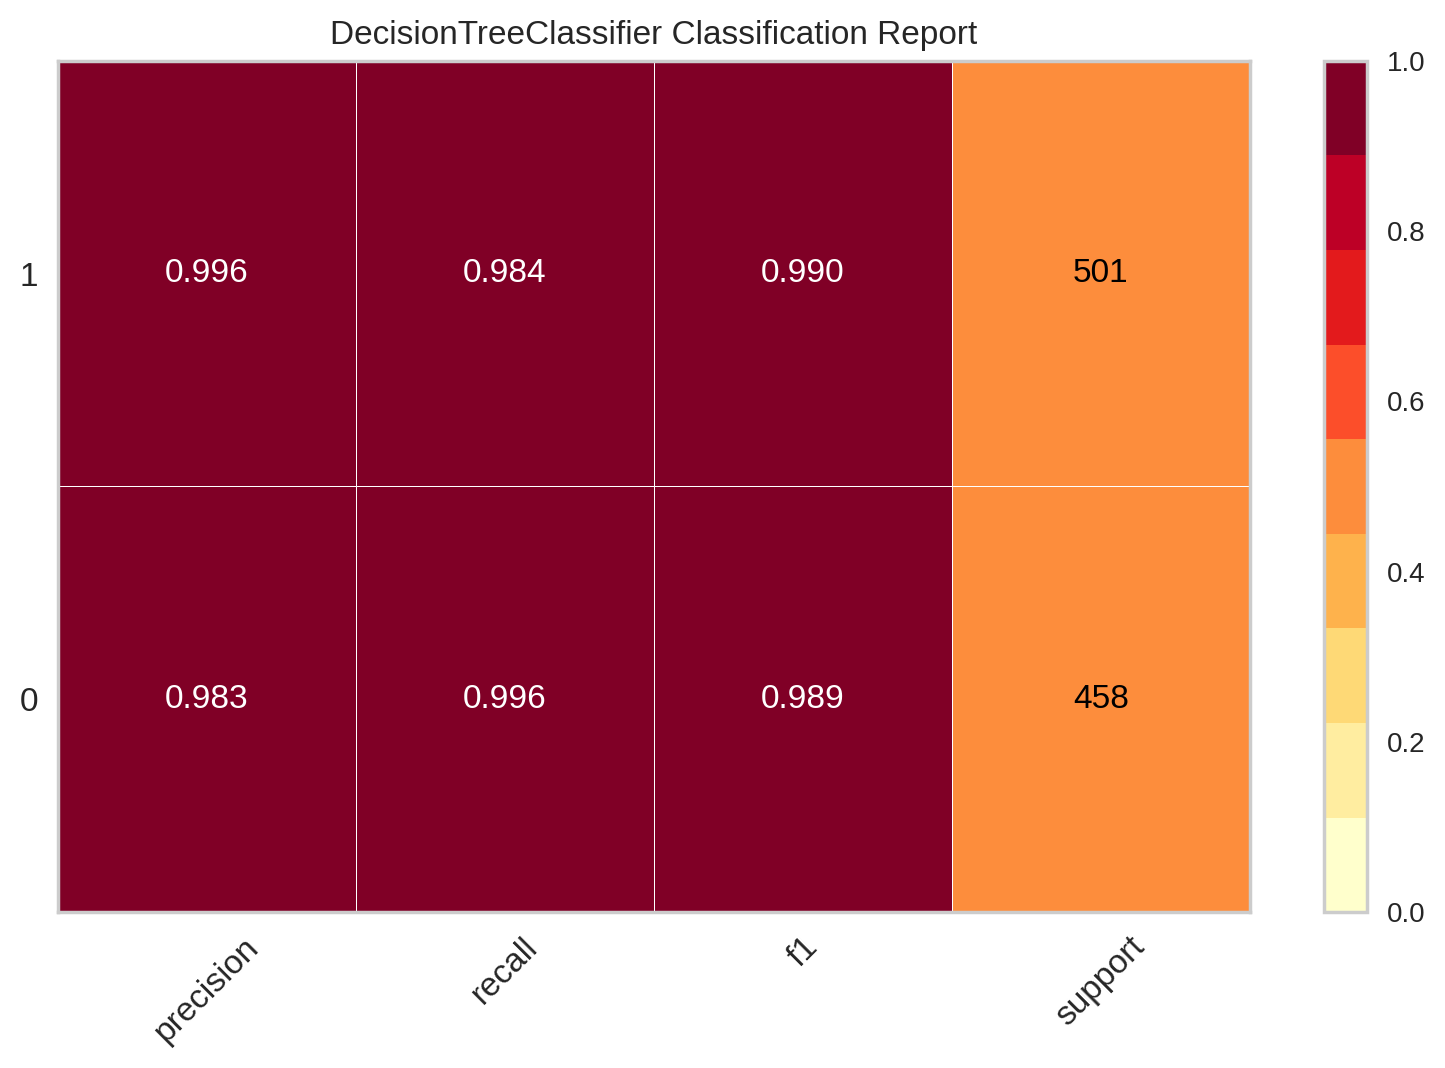

In [106]:
# to control the scale of plot
plot_model(best, plot = 'class_report', scale = 2)

In [107]:
# to save the plot
plot_model(best, plot = 'class_report', save=True)

'Class Report.png'

In [108]:
# train lightgbm model
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9911,0.9997,0.9911,0.9912,0.9911,0.9821,0.9823
1,0.9866,0.9966,0.9866,0.9870,0.9866,0.9732,0.9735
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9911,0.9998,0.9911,0.9911,0.9911,0.9821,0.9821
4,0.9955,0.9999,0.9955,0.9956,0.9955,0.9911,0.9911
5,0.9911,0.9999,0.9911,0.9911,0.9911,0.9821,0.9821
6,0.9866,0.9996,0.9866,0.9866,0.9866,0.9732,0.9732
7,0.9955,0.9999,0.9955,0.9956,0.9955,0.9910,0.9911
8,0.9865,0.9998,0.9865,0.9866,0.9865,0.9730,0.9731


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

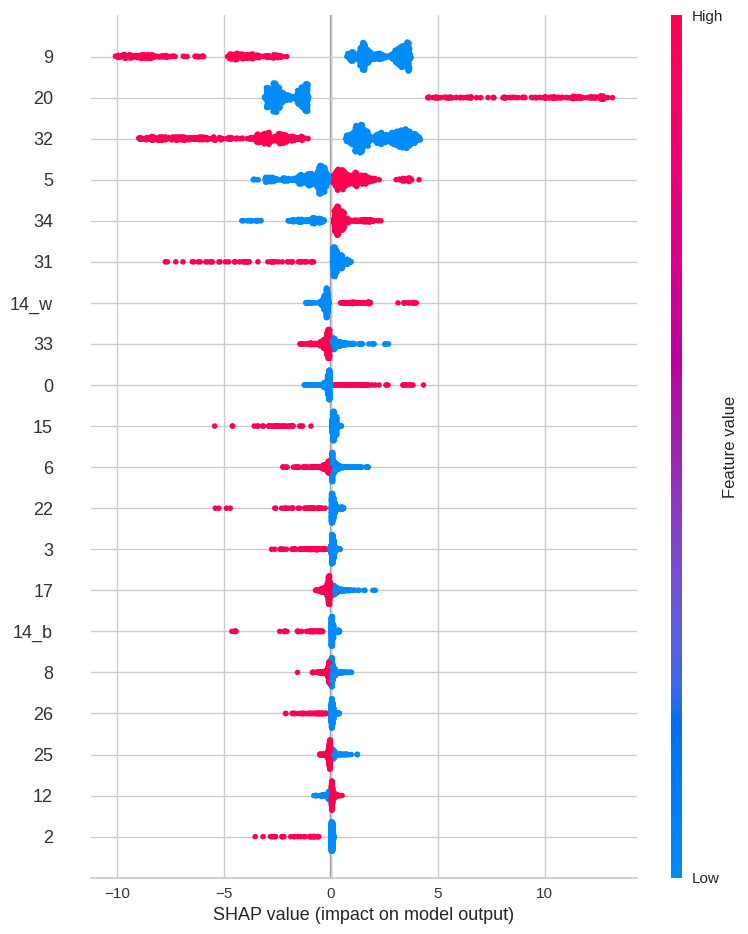

In [109]:
# interpret summary model
interpret_model(lightgbm, plot = 'summary')

In [110]:
# reason plot for test set observation 1
interpret_model(lightgbm, plot = 'reason', observation = 1)

In [111]:
# get leaderboard
lb = get_leaderboard()
lb

Processing:   0%|          | 0/57 [00:00<?, ?it/s]

,Model Name,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Index,,,,,,,,,
0,Logistic Regression,"(TransformerWrapperWithInverse(exclude=None, i...",0.9611,0.9921,0.9611,0.9613,0.9611,0.9220,0.9223
1,K Neighbors Classifier,"(TransformerWrapperWithInverse(exclude=None, i...",0.9473,0.9830,0.9473,0.9478,0.9472,0.8942,0.8948
2,Naive Bayes,"(TransformerWrapperWithInverse(exclude=None, i...",0.6629,0.9094,0.6629,0.7553,0.6157,0.3049,0.3903
3,Decision Tree Classifier,"(TransformerWrapperWithInverse(exclude=None, i...",0.9946,0.9948,0.9946,0.9947,0.9946,0.9893,0.9893
4,SVM - Linear Kernel,"(TransformerWrapperWithInverse(exclude=None, i...",0.9633,0.0000,0.9633,0.9635,0.9634,0.9266,0.9268
5,Ridge Classifier,"(TransformerWrapperWithInverse(exclude=None, i...",0.9450,0.0000,0.9450,0.9455,0.9449,0.8897,0.8903
6,Random Forest Classifier,"(TransformerWrapperWithInverse(exclude=None, i...",0.9888,0.9986,0.9888,0.9889,0.9888,0.9776,0.9777
7,Quadratic Discriminant Analysis,"(TransformerWrapperWithInverse(exclude=None, i...",0.6414,0.8934,0.6414,0.7796,0.5709,0.2570,0.3691
8,Ada Boost Classifier,"(TransformerWrapperWithInverse(exclude=None, i...",0.9651,0.9929,0.9651,0.9653,0.9651,0.9301,0.9303


In [112]:
# select the best model based on F1
lb.sort_values(by='F1', ascending=False)['Model'].iloc[0]

Pipeline(memory=Memory(location=None),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None, include=[],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean',
                                                              verbo...
                                    transformer=MinMaxScaler(clip=False,
                                                             copy=True,
                                                             feature_range=(0,
                                                                            1)))),
                ['trained_model',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        random_state=123, splitter='best')]],
         verbose=False)

In [113]:
automl()

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=123, splitter='best')

In [114]:
# dashboard function
dashboard(dt, display_format ='inline')

Note: model_output=='probability', so assuming that raw shap output of DecisionTreeClassifier is in probability space...
Generating self.shap_explainer = shap.TreeExplainer(model)
Building ExplainerDashboard..
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...
Calculating prediction probabilities...
Calculating metrics...
Calculating confusion matrices...
Calculating classification_dfs...
Calculating roc auc curves...
Calculating pr auc curves...
Calculating liftcurve_dfs...
Calculating shap interaction values... (this may take a while)
Reminder: TreeShap computational complexity is O(TLD^2), where T is the number of trees, L is the maximum number of leaves in any tree and D the maximal depth of any tree. So reducing these will speed up the calculation.
Calculating dependencies...
Calculating permutation importances (if slow, try setting n_jobs parameter)...
Calculating predictions...
Calculating pred_

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [115]:
# create gradio app
create_app(best)

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://c4b2da66024bca1df3.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [116]:
# create api
create_api(best, api_name = 'my_first_api')

API successfully created. This function only creates a POST API, it doesn't run it automatically. To run your API, please run this command --> !python my_first_api.py


In [120]:
# !python my_first_api.py

In [121]:
# check out the .py file created with this magic command
# %load my_first_api.py

In [117]:
create_docker('my_first_api')

Writing requirements.txt
Writing Dockerfile
Dockerfile and requirements.txt successfully created.
    To build image you have to run --> !docker image build -f "Dockerfile" -t IMAGE_NAME:IMAGE_TAG .
            


In [122]:
# check out the DockerFile file created with this magic command
# %load DockerFile

In [123]:
# check out the requirements file created with this magic command
# %load requirements.txt

In [118]:
final_best = finalize_model(best)

In [119]:
final_best

Pipeline(memory=Memory(location=None),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None, include=[],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean',
                                                              verbo...
                                    transformer=MinMaxScaler(clip=False,
                                                             copy=True,
                                                             feature_range=(0,
                                                                            1)))),
                ('actual_estimator',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        random_state=123, splitter='best'))],
         verbose=False)

In [124]:
# transpiles learned function to java
print(convert_model(dt, language = 'java'))

public class Model {
    public static double[] score(double[] input) {
        double[] var0;
        if (input[22] <= 0.5) {
            if (input[34] <= 0.5) {
                if (input[9] <= 0.5) {
                    if (input[33] <= 0.5) {
                        if (input[36] <= 0.5) {
                            if (input[14] <= 0.5) {
                                if (input[0] <= 0.5) {
                                    if (input[5] <= 0.5) {
                                        if (input[24] <= 0.5) {
                                            var0 = new double[] {1.0, 0.0};
                                        } else {
                                            if (input[35] <= 0.5) {
                                                if (input[21] <= 0.5) {
                                                    var0 = new double[] {0.0, 1.0};
                                                } else {
                                                    var0 = new double[

In [125]:
# deploy model on aws s3
# deploy_model(best, model_name = 'my_first_platform_on_aws',
#             platform = 'aws', authentication = {'bucket' : 'pycaret-test'})

In [126]:
# load model from aws s3
# loaded_from_aws = load_model(model_name = 'my_first_platform_on_aws', platform = 'aws',
#                              authentication = {'bucket' : 'pycaret-test'})

# loaded_from_aws

In [127]:
# save model
save_model(best, 'my_first_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None, include=[],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbo...
                                     transformer=MinMaxScaler(clip=False,
                               

In [128]:
# load model
loaded_from_disk = load_model('my_first_model')
loaded_from_disk

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None, include=[],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='...
                                    transformer=MinMaxScaler(clip=False,
                                                             copy=True,
                                                             feature_range=(0,
                                                                            1)))),
                ('trained_model',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        random_state=123, splitter='best'))],
         verbose=False)

In [129]:
# save experiment
save_experiment('my_experiment')

In [130]:
# load experiment from disk
exp_from_disk = load_experiment('my_experiment', data=data)

,Description,Value
0,Session id,123
1,Target,36
2,Target type,Binary
3,Target mapping,"nowin: 0, won: 1"
4,Original data shape,"(3196, 37)"
5,Transformed data shape,"(3196, 39)"
6,Transformed train set shape,"(2237, 39)"
7,Transformed test set shape,"(959, 39)"
8,Ordinal features,34
9,Categorical features,36
